In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import ast
from collections import Counter

Let's see if the majority is always right !

In [25]:
# Load the data
finished_paths = pd.read_csv("data/clean_finished_paths.csv")

In [7]:
finished_paths.describe()

,durationInSec,rating,nb_clicks,nb_back_clicks,path_length
count,50435.000000,50435.000000,50435.000000,50435.000000,50435.000000
mean,160.374224,0.837216,5.802280,0.406840,4.988599
std,363.282630,1.821862,4.701593,1.461343,3.302091
min,1.000000,-1.000000,1.000000,0.000000,1.000000
25%,62.000000,-1.000000,4.000000,0.000000,3.000000
50%,108.000000,1.000000,5.000000,0.000000,4.000000
75%,185.000000,2.000000,7.000000,0.000000,6.000000
max,35091.000000,5.000000,434.000000,45.000000,404.000000


In [10]:
finished_paths.columns

Index(['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating',
       'nb_clicks', 'nb_back_clicks', 'path_length', 'source', 'target',
       'source_category', 'target_category', 'source_general_category',
       'target_general_category'],
      dtype='object')

In [26]:
# Split the path into a list
finished_paths["path"] = finished_paths["path"].apply(lambda x: ast.literal_eval(x))

In [38]:
occ_all = Counter()
for p in finished_paths["path"]:
    occ_all += Counter(p)

In [39]:
occ_all.most_common(10)

[('<', 20519),
 ('United_States', 8812),
 ('Europe', 4314),
 ('United_Kingdom', 3882),
 ('England', 3294),
 ('Earth', 3174),
 ('Africa', 2782),
 ('World_War_II', 2265),
 ('North_America', 1858),
 ('Germany', 1746)]

In [49]:
occ_dest = Counter([p[-1] for p in finished_paths["path"]])

In [51]:
# We will try as 
occ_dest.most_common(10)

[('Telephone', 1101),
 ('Viking', 1046),
 ('Zebra', 935),
 ('Bean', 662),
 ('Adolf_Hitler', 568),
 ('Sun', 176),
 ('Jesus', 174),
 ('God', 168),
 ('Wood', 147),
 ('The_Holocaust', 137)]

In [96]:
def find_target(target, list):
    # Find the target and its successor
    ret = ''
    for i in range(len(list) - 1):  # Stop before the last element
        if list[i] == target:
            ret = list[i+1]
    return ret

In [97]:
def find_next(source, dest, df):
    paths_src = df[df['path'].apply(lambda x: source in x and x[-1]==dest)]['path']
    next_list = [find_target(source, path) for path in paths_src]
    next_list = [elem for elem in next_list if elem != '']
    print(next_list)
    if not next_list:
        return '' 
    else:
        return Counter(next_list).most_common(1)[0][0]


In [98]:
find_next('North_America', 'Telephone', finished_paths)

['United_States', '<', 'United_States', 'United_States', 'United_States', 'Earth', 'United_States', 'United_States', '<', 'United_States', 'United_States', 'United_States', 'United_States', 'Europe']


'United_States'

In [99]:
find_next('Computer', 'Telephone', finished_paths)

['Telephone', 'Telephone', 'Telephone', 'Telephone', 'Middle_Ages', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Electronics', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Electrical_engineering', 'Telephone', 'Electricity', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Electrical_engineering', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Internet', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Automobile', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Electricity', '<', 'Telephone', 'Telephone', 'Telephone', 'Watch', 'Telephone', 'Telephone', 'Electricity', 'Telephone', 'Telephone', 'Electricity', 'Telephone', 'Internet', 'Telephone', 'Telephone', 'Telephone', 'Electricity', 'Telephone', 'Telephone', 'Telephone', 'History_of_computing_hardware', 'Electricity', 'Telephone', 'Telephone', 'Telephone', 'Telephone', 'Electronics', 'Telephone', 'Telephone', 'Telephone', 'Telephone',

'Telephone'

In [100]:
def crowd(src, dest, df):
    next = src
    path = [src]
    while(next != dest):
        next = find_next(next, dest, df)
        if not(next in path) and next != '':
            path.append(next)
        else:
            break
    return path

In [101]:
crowd('England', 'Telephone', finished_paths)

['Scotland', 'London_Underground', 'Europe', 'Northern_Ireland', 'Tim_Berners-Lee', '19th_century', 'Industrial_Revolution', 'Finance', 'Tim_Berners-Lee', '19th_century', 'United_Kingdom', 'Pound_sterling', 'Atlantic_Ocean']
['<', 'Computer']
['World_Wide_Web', 'United_Kingdom', 'Retina', 'Light', 'English_language', 'Information', '20th_century', 'English_language', 'Programming_language', 'Mammal', 'Television', 'Mammal', 'Information', 'List_of_countries_by_system_of_government', 'Telephone', 'Medicine', 'Human', 'Psychology', 'Mind', 'Mind', 'World_Wide_Web', 'Emotion', 'Language', 'Information', 'Television', 'Vertebrate', 'Manufacturing', 'Sleep', 'Communication', 'Internet', 'United_States', 'Engineering', 'Linguistics', 'Electronics', 'Vertebrate', 'Telecommunication', 'Emotion', 'Optical_fiber', 'Electricity', 'Technology', 'Eye', 'Communication', 'Internet', 'Thomas_Edison', 'Copper', 'Bluetooth', 'Mass_media', 'Telecommunication', 'Advertising', 'Southern_United_States', 'Hu

['England',
 'Tim_Berners-Lee',
 '<',
 'Computer_science',
 'Information',
 'Communication',
 'Telephone']

In [102]:
words = set()
for p in finished_paths["path"]:
    words.update(p)

In [103]:
len(words)

4170

In [110]:
[tup[0] for tup in occ_all.most_common(40)]

['<',
 'United_States',
 'Europe',
 'United_Kingdom',
 'England',
 'Earth',
 'Africa',
 'World_War_II',
 'North_America',
 'Germany',
 'Animal',
 'Human',
 'France',
 'Mammal',
 'Computer',
 'Science',
 'English_language',
 'Periodic_table',
 'Atlantic_Ocean',
 'Brain',
 'India',
 'Telephone',
 'Viking',
 'Plant',
 'Asia',
 'Asteroid',
 'Agriculture',
 'Bird',
 'China',
 'Christianity',
 'United_Nations',
 'Japan',
 'Internet',
 'Zebra',
 'Theatre',
 'Russia',
 'Australia',
 'Chemistry',
 'London',
 'South_America']

In [156]:
# Let's see how well does the crowd in this game
ans_crowd = []
for w1 in [tup[0] for tup in occ_all.most_common(40)]:
    for w2 in [tup[0] for tup in occ_dest.most_common(30)]:
        if w1 != w2 and w1 != '<' and w2 != '<':
            ans_crowd.append(crowd(w1, w2, finished_paths))

['Television', 'Television', 'Internet', 'Computer', 'Abraham_Lincoln', 'Electronics', '<', 'Electronics', 'Internet', 'Television', 'Electronics', 'Electronics', 'Computer', 'Computer', 'Broadcasting', 'North_America', 'Corporation', 'Japan', 'Broadcasting', 'Television', 'Thomas_Jefferson', 'California', 'Computer', 'Electronics', 'Internet', 'Electronics', 'Internet', 'United_States_Declaration_of_Independence', 'Electronics', 'Computer', 'Internet', 'Electronics', 'United_States_Declaration_of_Independence', 'United_Kingdom', 'Broadcasting', 'California', 'Computer', 'Television', 'George_Washington', 'Electronics', 'Television', 'New_York_City', 'Electronics', 'Denver%2C_Colorado', 'Canada', 'Television', 'Television', 'Canada', 'Computer', 'Advertising', '<', 'Advertising', 'Television', 'Electronics', 'Computer', 'American_popular_music', 'Computer', 'Broadcasting', 'Electronics', 'Computer', 'Computer', 'Electronics', 'Atlantic_Ocean', 'Computer', 'Moon', 'Cold_War', 'New_York_

In [157]:
ans_stats = []
for src in [tup[0] for tup in occ_all.most_common(40)]:
    for dst in [tup[0] for tup in occ_dest.most_common(30)]:
        if src != dst and src != '<' and dst != '<':
            paths = finished_paths[finished_paths['path'].apply(lambda x: src in x and x[-1]==dst)]['path']
            # Find the index of the first occurrence of the target element
            paths_src = []
            for p in paths:
                start_index = p.index(src)
                paths_src.append(p[start_index:])
            if len(paths_src) == 0:
                ans_stats.append(-1)
            else:
                ans_stats.append(sum(len(p) for p in paths_src) / len(paths_src))

In [158]:
ans_stats = np.array(ans_stats)

In [160]:
crowd_stats = np.array(list(map(lambda x: len(x), ans_crowd)))

In [161]:
crowd_stats.shape

(1164,)

In [159]:
ans_stats.shape

(1164,)

In [146]:
np.all(crowd_stats > 0)

True

In [162]:
correct_indices = np.where(ans_stats != -1)[0]
ans_stats = ans_stats[correct_indices]
crowd_stats = crowd_stats[correct_indices]

In [164]:
print(ans_stats.shape)
print(crowd_stats.shape)

(650,)
(650,)


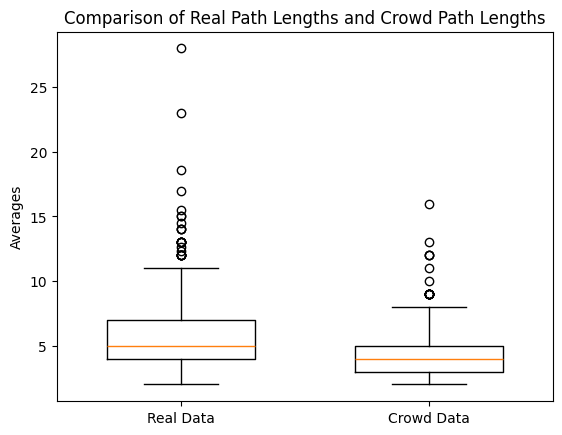

In [167]:
plt.boxplot([ans_stats, crowd_stats], positions=[1, 2], widths=0.6)
plt.xticks([1, 2], ['Real Data', 'Crowd Data'])
plt.title("Comparison of Real Path Lengths and Crowd Path Lengths")
plt.ylabel("Averages")
plt.show()

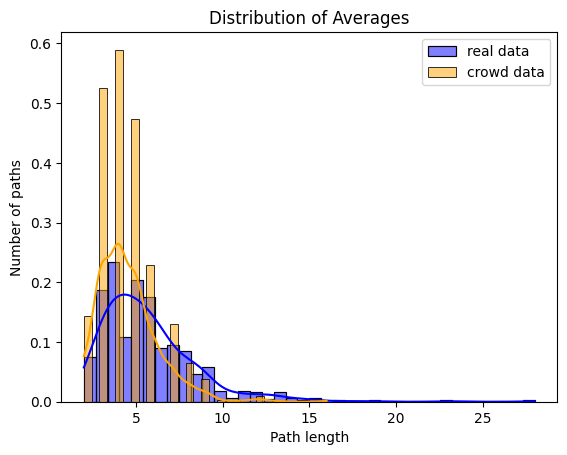

In [ ]:
ax = sns.histplot(ans_stats, kde=True, stat='density', color='blue', label='real data')
ax = sns.histplot(crowd_stats, kde=True, stat='density', color='orange', label='crowd data')
ax.set(title='Distribution of Averages',xlabel='Path length', ylabel='Proportion of paths')
plt.legend()
plt.show()

Let's see for how many games, the crowd was right or had the same length

In [174]:
np.sum((ans_stats - crowd_stats) >= 0) / len(ans_stats)

0.9138461538461539

So 91% of time, the crowd was right.